In [7]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Dipto\Anaconda33\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# Loading The Dataset

In [13]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name=["id","clump_thickness","uniform_cell_size","uniform_cell_shape","marginal_adhesion","single_epithelial_size","bare_nuclei","bland_chromatin","normal_nucleoli","mitoses","class"]
df=pd.read_csv(url,names=name)

In [14]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [16]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epithelial_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [20]:
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 11)


In [23]:
df.drop(['id'],axis=1,inplace=True)

In [24]:
print(df.shape)
df.describe()

(699, 10)


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Visualizations

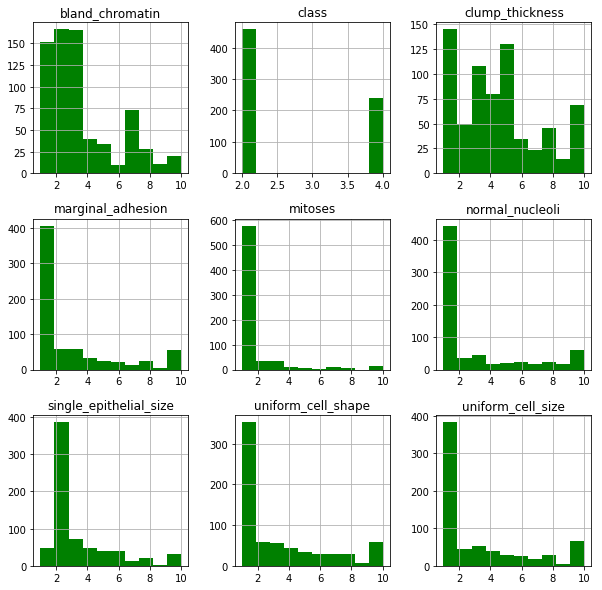

In [27]:
#Plot Histograms for each Variable
df.hist(figsize=(10,10),color="green")
plt.show()